In [98]:
import pandas as pd
from collections import Counter
import matplotlib.pylab as plt
import numpy as np

df= pd.read_csv('RAW_recipes.csv')
timer=df.minutes
ingred=df.n_ingredients
#analyze whats the distribution of time to cook 
timer_count=Counter(timer)
d=timer_count.items()
minutes=np.array([x[0] for x in d])
quantity=np.array([x[1] for x in d])
max_time=120 #2hours
for i in range(len(minutes)):
    if minutes[i]>max_time: #for ease let's remove the recipes if they take more than max_time to cook 
        minutes[i]=0
        quantity[i]=0
    #round the time to cook to the nearest time factor of 5 minutes
    if minutes[i]%5!=0:#if the time to cook is not a factor of 5 (e.g. 5, 10, 15 minutes)
        d=minutes[i]
        minutes[i]=round(d/5)*5 # approximate to the nearest 5 minutes

In [99]:
#Now 2 lists minutes1 and quantity1 prepresent how many recipes can be cooked in 5, 10, 15,... minutes
#next few lines just cleaning the data
minutes1=[int(a) for a in minutes if int(a)!=0]
quantity1=[int(b) for b in quantity if int(b)!=0]
minutes2=[i*5 for i in range(int((max_time)/5)+1)]
quantity2=[0]*len(minutes2)


In [100]:
for i in range(len(minutes2)):
    a=minutes2[i]
    for k in range(len(minutes1)):
        if minutes1[k]==a:
            quantity2[i]=quantity2[i]+quantity1[k]
            

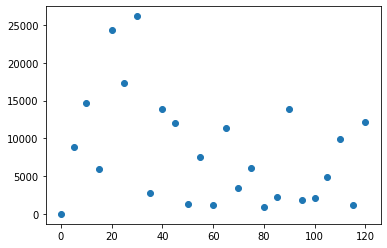

In [101]:
#print(minutes1[:20])
fig = plt.figure()
ax = fig.add_subplot(111)

#show distribution of how many recipes depending on how much time to cook
ax.plot(minutes2,quantity2,'o')
plt.show()

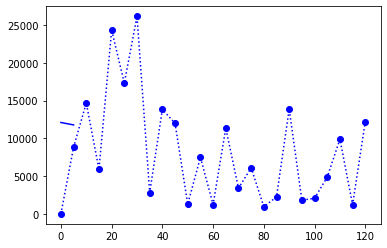

In [106]:
poly_min = np.poly1d(np.polyfit(minutes2, quantity2, 1))
plt.plot(minutes2, quantity2, 'bo:')
poly_x = np.linspace(0, 5, 120)
plt.plot(poly_x, poly_min(poly_x), 'b')
#plot how many recipes for 5, 10, 15, .. minutes of cooking time

In [107]:
print(len(minutes2))

25
